In [41]:
%matplotlib inline
import json
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib

cuisine_id = []
cuisine = []
recipe = []

with open('train.json') as f:
	data = json.load(f)
	for i in data:
		cuisine_id.append(i['id'])
		cuisine.append(i['cuisine'])
		recipe.append(i['ingredients'])
     
train = pd.DataFrame({'Cuisine_id':cuisine_id, 'Cuisine': cuisine, 'Recipe':recipe})

cuisine =  np.unique(cuisine)
cuisine

array([u'brazilian', u'british', u'cajun_creole', u'chinese', u'filipino',
       u'french', u'greek', u'indian', u'irish', u'italian', u'jamaican',
       u'japanese', u'korean', u'mexican', u'moroccan', u'russian',
       u'southern_us', u'spanish', u'thai', u'vietnamese'],
      dtype='<U12')

We will also need a list of unique ingredients 

In [30]:
uniqueIng = []

for stuff in recipe:
    uniqueIng+= list(filter(lambda x: x not in uniqueIng, stuff))
    
uniqueIng

[u'romaine lettuce',
 u'black olives',
 u'grape tomatoes',
 u'garlic',
 u'pepper',
 u'purple onion',
 u'seasoning',
 u'garbanzo beans',
 u'feta cheese crumbles',
 u'plain flour',
 u'ground pepper',
 u'salt',
 u'tomatoes',
 u'ground black pepper',
 u'thyme',
 u'eggs',
 u'green tomatoes',
 u'yellow corn meal',
 u'milk',
 u'vegetable oil',
 u'mayonaise',
 u'cooking oil',
 u'green chilies',
 u'grilled chicken breasts',
 u'garlic powder',
 u'yellow onion',
 u'soy sauce',
 u'butter',
 u'chicken livers',
 u'water',
 u'wheat',
 u'black pepper',
 u'shallots',
 u'cornflour',
 u'cayenne pepper',
 u'onions',
 u'garlic paste',
 u'lemon juice',
 u'chili powder',
 u'passata',
 u'oil',
 u'ground cumin',
 u'boneless chicken skinless thigh',
 u'garam masala',
 u'double cream',
 u'natural yogurt',
 u'bay leaf',
 u'sugar',
 u'fresh ginger root',
 u'ground cinnamon',
 u'vanilla extract',
 u'ground ginger',
 u'powdered sugar',
 u'baking powder',
 u'olive oil',
 u'medium shrimp',
 u'chopped cilantro',
 u'jal

We will extract the most commonly used ingredients per cuisine

TypeError: 'list' object is not callable

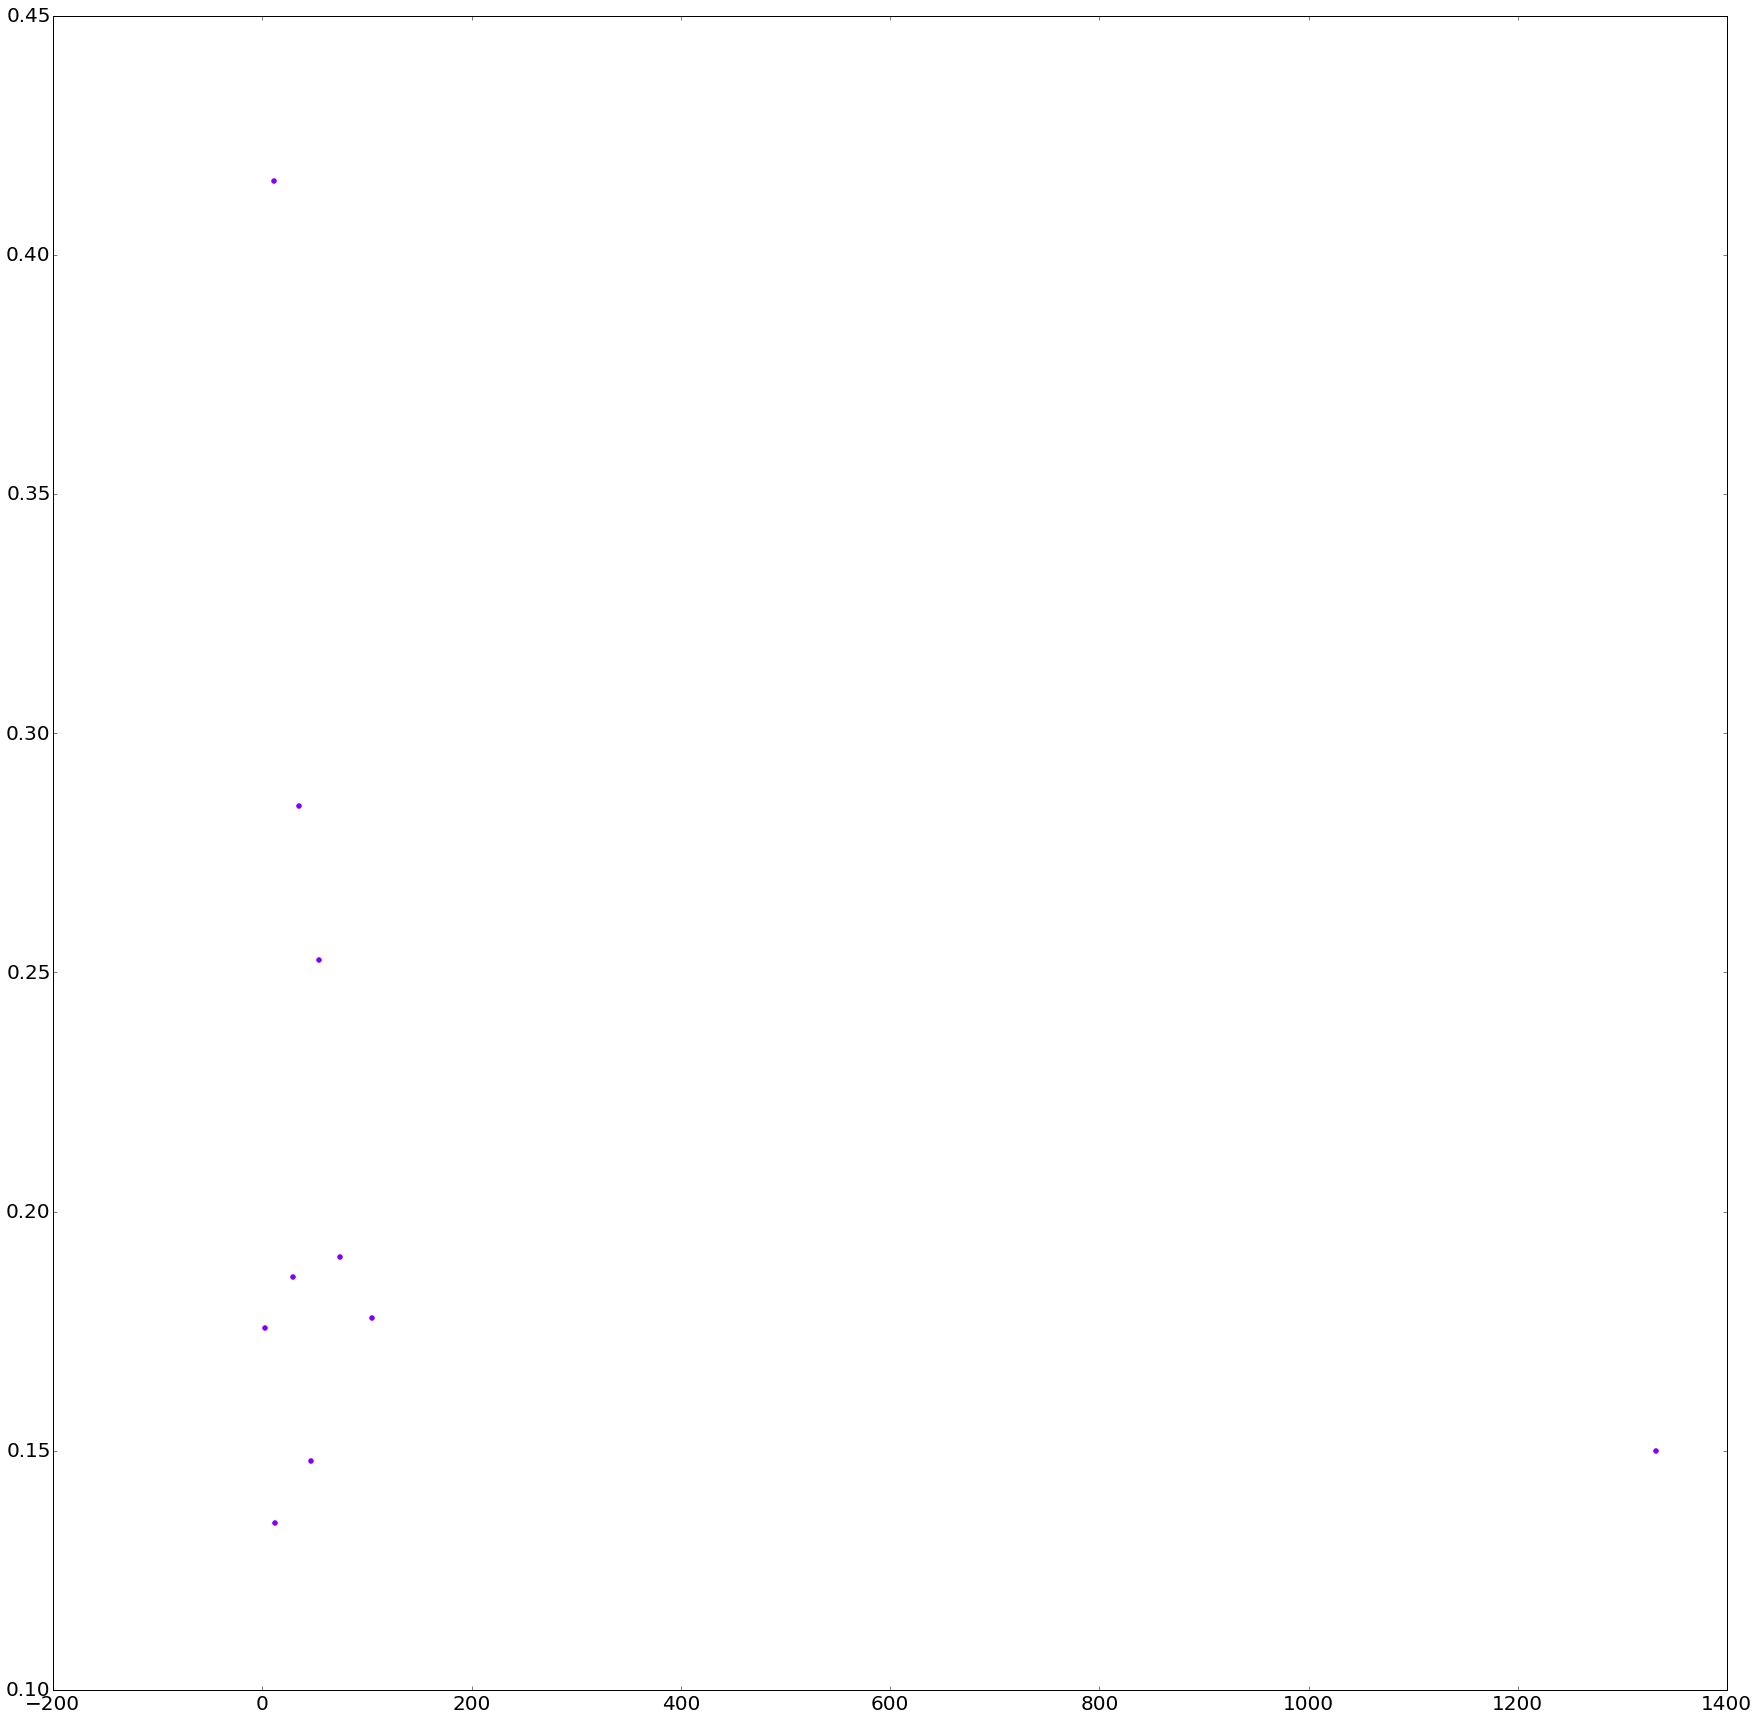

In [49]:
def cuisine_ingredients(cuisine_type, top_num=10):
    dish = train[train['Cuisine']==cuisine_type]['Recipe']
    combined = np.unique(reduce(lambda x,y: x+y, dish), return_counts=True)
    top_count = [x for (y,x) in reversed(sorted(zip(combined[1], combined[0])))]
    total_num = train[train['Cuisine']==cuisine_type]['Cuisine'].count()
    percentage = combined[1].astype('float64')/float(total_num)
    return top_count[:top_num], list(reversed(sorted(percentage)))[:top_num]

matplotlib.rcParams.update({'font.size': 20})

fig = plt.figure(figsize=(30,30))
rainbow = cm.rainbow(np.linspace(0,1,len(cuisine)))
for country, c in zip(cuisine,rainbow):
    cplot = cuisine_ingredients(country)
    nameIndex = [uniqueIng.index(stuff) for stuff in cplot[0]]
    plt.scatter(nameIndex,cplot[1], label=country, color= c)
    plt.set_xlim(0,400)

plt.legend()
plt.show()